In [1]:
import itertools
import sinter
from main.codes.tic_tac_toe.gauge.GaugeFloquetColourCode import GaugeFloquetColourCode
from main.codes.tic_tac_toe.gauge.GaugeHoneycombCode import GaugeHoneycombCode
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from fractions import Fraction



In [2]:
def fit_line_slope(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    A = np.vstack([xs, np.ones(len(xs))]).T
    m, c = np.linalg.lstsq(A, ys, rcond=None)[0]
    return m

def format_code_label(code_name):
    code_name_to_label = {
        'GaugeHoneycombCode': 'HCC',
        'GaugeFloquetColourCode': 'FCC'
    }
    if code_name_to_label.get(code_name[0], code_name) == 'HCC':
        return(f"$X^{code_name[1:][0]}Y^{code_name[1:][1]}Z^{code_name[1:][2]}$")
    else:
        return(f"$X^{code_name[1:][0]}Z^{code_name[1:][1]}$")




In [3]:

def get_distances(code, rounds_list, error_type):
    return [code.get_graphlike_timelike_distance(rounds,'X',error_type) for rounds in rounds_list]

def calc_slope(rounds_list, code, error_type):
    distances = get_distances(code, rounds_list, error_type)
    slope = fit_line_slope(rounds_list, distances)
    return slope

def calc_fraction_slope(error_type):
    rounds_list = range(50,100)

    hcc_slopes = []
    fcc_slopes = []
    fraction_slope_dir = dict()
    fraction_slope_dir['hcc'] = defaultdict(list)
    fraction_slope_dir['fcc'] = defaultdict(list)
    for gauge_factors in itertools.product([1, 2, 3], repeat=3):
        slope =calc_slope(rounds_list, GaugeHoneycombCode(4, list(gauge_factors)), error_type)
        fraction_slope = Fraction(slope).limit_denominator(10)
        fraction_slope_dir["hcc"][slope].append([fraction_slope, gauge_factors])
        hcc_slopes.append(slope)

    for gauge_factors in itertools.product([1, 2, 3], repeat=2):
        slope = calc_slope(rounds_list, GaugeFloquetColourCode(4, list(gauge_factors)), error_type)
        fraction_slope = Fraction(slope).limit_denominator(10)
        fraction_slope_dir["fcc"][slope].append([fraction_slope, gauge_factors])
        fcc_slopes.append(slope)
    
    hcc_slopes.sort(reverse=True)
    fcc_slopes.sort(reverse=True)
    return hcc_slopes, fcc_slopes, fraction_slope_dir


In [ ]:
hcc_slopes_EM3, fcc_slopes_EM3, fraction_slope_dir_EM3 = calc_fraction_slope("EM3")
hcc_slopes, fcc_slopes, fraction_slope_dir = calc_fraction_slope("phenomenological_noise")
hcc_slopes_cln, fcc_slopes_cln, fraction_slope_dir_cln = calc_fraction_slope("circuit_level_noise")



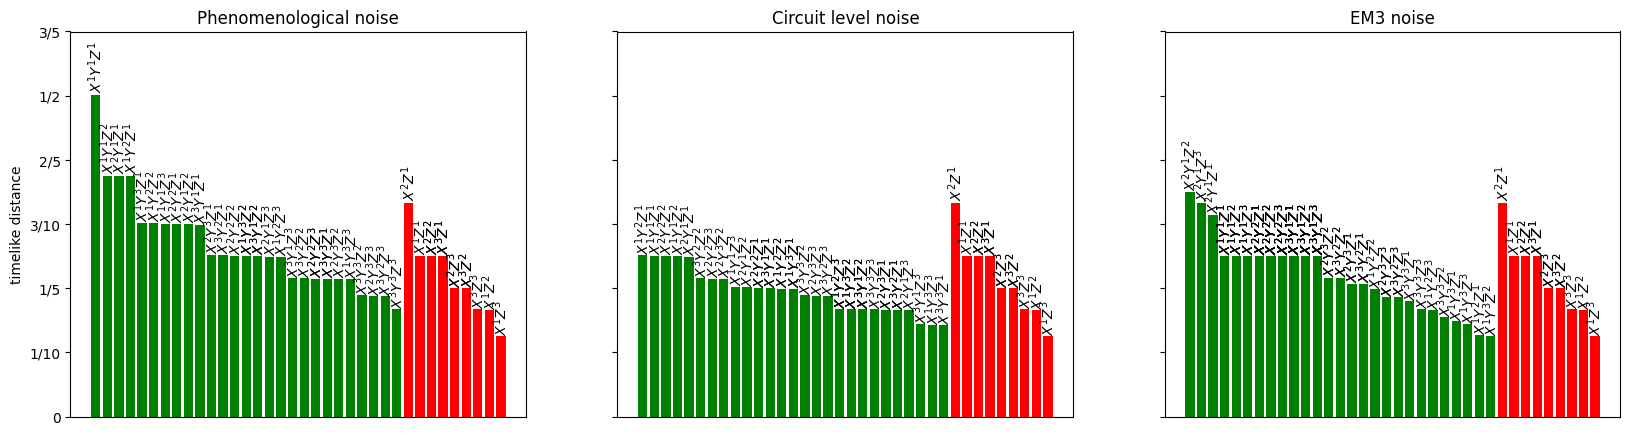

In [12]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)

def format_code_label(gauge_factors):
    if len(gauge_factors) == 3:
        return(f"$X^{gauge_factors[0]}Y^{gauge_factors[1]}Z^{gauge_factors[2]}$")
    
    else: 
        return(f"$X^{gauge_factors[0]}Z^{gauge_factors[1]}$")

code_to_color = {'hcc' : 'green', 'fcc' : 'red'}

def plot_slopes(ax, code, slopes, fraction_slope_dir):
# Sample data
    xs = []
    for slope in slopes:
        for gauge_factors in fraction_slope_dir[slope]:
            bars = ax.bar(str(gauge_factors[1]), slope, label=format_code_label(gauge_factors[1]), color=code_to_color[code])
            for bar in bars:
                ax.text(bar.get_x() + bar.get_width() / 2.0, 1.01 * slope  , format_code_label(gauge_factors[1]) , ha='center', va='bottom', rotation=90)
                


plot_slopes(ax[0], 'hcc', hcc_slopes, fraction_slope_dir['hcc'])
plot_slopes(ax[0], 'fcc', fcc_slopes, fraction_slope_dir['fcc'])

plot_slopes(ax[1], 'hcc', hcc_slopes_cln, fraction_slope_dir_cln['hcc'])
plot_slopes(ax[1], 'fcc', fcc_slopes_cln, fraction_slope_dir_cln['fcc'])

plot_slopes(ax[2], 'hcc', hcc_slopes_EM3, fraction_slope_dir_EM3['hcc'])
plot_slopes(ax[2], 'fcc', fcc_slopes_EM3, fraction_slope_dir_EM3['fcc'])

# Function to format y-axis ticks as fractions
def fraction_formatter(x, pos):
    return str(Fraction(x).limit_denominator())

# Apply the formatter to the y-axis
ax[0].yaxis.set_major_formatter(FuncFormatter(fraction_formatter))
ax[0].set_xticks([])
ax[0].set_title("Phenomenological noise")
ax[0].set_ylim(0, 0.6)
ax[0].set_ylabel("timelike distance")

ax[1].yaxis.set_major_formatter(FuncFormatter(fraction_formatter))
ax[1].set_xticks([])
ax[1].set_title("Circuit level noise")

ax[2].set_title("EM3 noise")
ax[2].set_xticks([])
# Show the plot
plt.show()

# make the bars with the same timelike distance share the label

In [ ]:
fig, ax = plt.subplots(2,2, sharey=True, sharex='col', figsize=(10,10))

ax[0][0].set_title("Graphlike phenomenological noise")
ax[0][0].plot(rounds_list, xz_distance["pheno_graphlike"], label="$X^1 Z^1$: y = x/4")
ax[0][0].plot(rounds_list, xyz_distance["pheno_graphlike"], label="$X^1 Y^1 Z^1$: y = x/2")

ax[0][1].set_title("Graphlike circuit level noise")
#ax[0][1].plot(rounds_list, xz_distance["cln_graphlike"], label="$X^1 Z^1: y = x/4$")
ax[0][1].plot(rounds_list, xyz_distance["cln_graphlike"], label="$X^1 Y^1 Z^1: y = x/5$")
#ax[0][1].plot(rounds_list, [x/6 for x in rounds_list], label="y = x/5")

ax[1][0].set_title("Non-graphlike phenomenological noise")
ax[1][0].plot(rounds_list, xz_distance["pheno_non_graphlike"], label="$X^1 Z^1")
ax[1][0].plot(rounds_list, xyz_distance["pheno_non_graphlike"], label="$X^1 Y^1 Z^1$: y = x/4")


ax[1][1].set_title("Non-graphlike circuit level noise")
#ax[1][1].plot(rounds_list, xz_distance["cln_non_graphlike"], label="$X^1 Z^1$")
#ax[1][1].plot(rounds_list, xyz_distance["cln_non_graphlike"], label="$X^1 Y^1 Z^1$")

ax[1][0].set_xlabel("Rounds")
ax[1][1].set_xlabel("Rounds")
ax[0][0].set_ylabel("Distance")
ax[1][0].set_ylabel("Distance")

ax[0][0].legend()
ax[0][1].legend()

plt.savefig("timelike_distances.pdf")



In [ ]:
import itertools

fig, ax = plt.subplots(1,4, sharey=True, sharex='col', figsize=(10,10))

for gauge_factors in itertools.product([1, 2, 3], repeat=2):

    code = GaugeFloquetColourCode(4, list(gauge_factors))
    distance = get_distances(code, rounds_list)
    label = f"$X^{gauge_factors[0]} Z^{gauge_factors[1]}$"
    ax[0].plot(rounds_list, distance["pheno_graphlike"], label=label)



code_1_3 = GaugeFloquetColourCode(4, [1, 3])
distance_1_3 = get_distances(code_1_3, rounds_list)
ax[1].plot(rounds_list, distance_1_3["pheno_graphlike"], label="$X^1 Z^3$")

code_2_1 = GaugeFloquetColourCode(4, [2, 1])
distance_2_1 = get_distances(code_2_1, rounds_list)
ax[1].plot(rounds_list, distance_2_1["pheno_graphlike"], label="$X^2 Z^1$")

ax[1].fill_between(rounds_list, distance_1_3["pheno_graphlike"], distance_2_1["pheno_graphlike"], color='gray', alpha=0.5)


for gauge_factors in itertools.product([1, 2, 3], repeat=3):

    code = GaugeHoneycombCode(4, list(gauge_factors))
    distance = get_distances(code, rounds_list)
    label = f"$X^{gauge_factors[0]} Z^{gauge_factors[1]}$"
    ax[2].plot(rounds_list, distance["pheno_graphlike"], label=label)

code = GaugeHoneycombCode(4, list(gauge_factors))
distance = get_distances(code, rounds_list)
label = f"$X^{gauge_factors[0]} Z^{gauge_factors[1]}$"
ax[2].plot(rounds_list, distance["pheno_graphlike"], label=label)


In [ ]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(15,15), sharey=True)

def format_code_label(gauge_factors):
    if len(gauge_factors) == 3:
        return(f"$X^{gauge_factors[0]}Y^{gauge_factors[1]}Z^{gauge_factors[2]}$")
    
    else: 
        return(f"$X^{gauge_factors[0]}Z^{gauge_factors[1]}$")

code_to_color = {'hcc' : 'green', 'fcc' : 'red'}

def plot_slopes(ax, code, slopes, fraction_slope_dir):
# Sample data
    xs = []
    for slope in slopes:
        for gauge_factors in fraction_slope_dir[slope]:
            bars = ax.bar(str(gauge_factors[1]), slope, label=format_code_label(gauge_factors[1]), color=code_to_color[code])
            for bar in bars:
                ax.text(bar.get_x() + bar.get_width() / 2.0, 1.01 * slope  , format_code_label(gauge_factors[1]) , ha='center', va='bottom', rotation=90)
                


plot_slopes(ax[0][0], 'hcc', hcc_slopes, fraction_slope_dir['hcc'])
plot_slopes(ax[0][0], 'fcc', fcc_slopes, fraction_slope_dir['fcc'])

plot_slopes(ax[0][1], 'hcc', hcc_slopes_cln, fraction_slope_dir_cln['hcc'])
plot_slopes(ax[0][1], 'fcc', fcc_slopes_cln, fraction_slope_dir_cln['fcc'])

plot_slopes(ax[1][0], 'hcc', hcc_slopes_pheno_non_graphlike, fraction_slope_dir_pheno_non_graphlike['hcc'])
plot_slopes(ax[1][0], 'fcc', fcc_slopes_pheno_non_graphlike, fraction_slope_dir_pheno_non_graphlike['fcc'])

plot_slopes(ax[1][1], 'hcc', hcc_slopes_cln_non_graphlike, fraction_slope_dir_cln_non_graphlike['hcc'])
plot_slopes(ax[1][1], 'fcc', fcc_slopes_cln_non_graphlike, fraction_slope_dir_cln_non_graphlike['fcc'])

# Function to format y-axis ticks as fractions
def fraction_formatter(x, pos):
    return str(Fraction(x).limit_denominator())

# Apply the formatter to the y-axis
ax[0][0].yaxis.set_major_formatter(FuncFormatter(fraction_formatter))
ax[0][0].set_xticks([])
ax[0][0].set_title("Phenomenological noise graphlike")
ax[0][0].set_ylim(0, 0.6)
ax[0][0].set_ylabel("timelike distance")

ax[0][1].yaxis.set_major_formatter(FuncFormatter(fraction_formatter))
ax[0][1].set_xticks([])
ax[0][1].set_title("Circuit level noise graphlike")

# Show the plot
plt.show()